#### BUDT 758X INTRODUCTION TO PYTHON
## PROJECT REPORT
## GROUP - 22

##### WENQI HOU, GAURAVI SAHA, MANYING (JANE) TSANG

### YELP DATA - RECOMMENDATION SYSTEM FOR FINDING THE TOP 5 RESTAURANTS

##### CONTEXT OF THE DATA
We have chosen to pick Yelp dataset for three main reasons: 
- The data is feasible and has potential due to large volumes (3.6GB)
- Since we have gathered the information from the Yelp website, it is authentic and will help us develop practical insights. 
- The datasets include multitude of restaurants, 36 states, 1200 cities and users nationwide which enriches the quality of the data. 

### Why Las Vegas?

We have picked Las Vegas because the city has the highest number of restaurants and a lot of potential for diverse perspectives on the data owing to tourism. Because of various parameters to work with, Las Vegas forms the focal point of our data exploration.



### 1. Overall Project Objectives

Focusing on Las Vegas restaurants, we are implementing a high fidelity system for a user, restaurant and Yelp to transform the restaurant recommendation experience. Gather regional specific insights about our customer base, develop strategic factors that would influence a customer’s decision to visit a particular restaurant.

 - User Perspective: Trending cuisines, upscale bars, quality of restaurants to garner a wholesome experience for the customer.
 - Restaurant’s Profitability: Identifying revenue from highly reviewed users, targeted success through region specific analytics. 
 - Yelp’s Perspective: Testing Yelp’s tracking mechanism of restaurant hours, abreast with current status of restaurants (newly opened, permanently closed, etc). Develop a recommendation system for a new customer and identify the top 5 restaurants based on certain input parameters like cuisine, ambience, type of restaurant, etc.




### 2. Description of Data

5 datasets in json format retrieved from Yelp website : business.json, user.json, checkin.json, tip.json and review.json.

- business_id: ID of the business
- name: name of the business
- neighborhood
- address: address of the business
- city: city of the business
- state: state of the business
- postal_code: postal code of the business
- latitude: latitude of the business
- longitude: longitude of the business
- stars: average rating of the business
- review_count: number of reviews received
- is_open: 1 if the business is open, 0 therwise
- categories: multiple categories of the business

Review has the following attributes:

- review_id: ID of the review
- user_id: ID of the user
- business_id: ID of the business
- stars: ratings of the business
- date: review date
- text: review from the user
- useful: number of users who vote a review as usefull
- funny: number of users who vote a review as funny
- cool: number of users who vote a review as cool

User data has these variables:
- average stars
- compliment_cool, compliment_cute, compliment_funny, compliment_hot, compliment_list, compliment_more, compliment_note, compliment_photos, compliment_plain, compliment_profile, compliment_writer
- cool
- elite
- fans
- friends
- funny
- name
- review_counts
- useful
- user_id
- yelping_since

Check in has two columns: 

- business_id
- date

And the most important data for our analysis: Tip data

- business_id
- compliment_count
- date
- text
- user_id

### 3. Data Processing Tasks

#### Generating a cleaned and transformed version of the data:

1. Transfer json into pandas dataframe with proper indexing Extract data that includes restaurants in Las Vegas.
2. Replace garbage data which includes incorrect states and postal codes, etc Replace missing values. 
3. Date transformations and standardization.
4. Merge multiple dataframes and reshape.
5. Delete unnecessary columns which could add ambiguity based on logical assumptions.
6. Delete duplicate restaurants entries and combine their reviews.
7. Fix typographical errors in reviews.
8. Data discretize review counts.
9. Count user’s rating as a function of restaurants’ type and find their preference Improve the accuracy of business category by tracking ‘buzz words’ in review


### Enhancement to the Data:

We have improved and enhanced the data at every level by cleaning information within the columns. Further data cleaning and enhancements are covered in the data cleaning section.

### 4. Explanatory Data Analysis

### Data Import

We imported our large json file into dataframes by spliting each file into multiple chunks, then convert these chunks to a list, and concatenated them to a final dataframe.
After creating one dataframe, we check the columns, the shapes and the head of the dataframe to get an overall idea of what our data looks like and its features.

In [1]:
import json
import pandas as pd

In [2]:
frames_tip = []
for chunk in pd.read_json('tip.json', lines=True, chunksize = 10000):
    frames_tip.append(chunk)
tip=pd.concat(frames_tip)

In [3]:
tip.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [4]:
tip.head()

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [5]:
frames_checkin = []
for chunk in pd.read_json('checkin.json', lines=True, chunksize = 10000):
    frames_checkin.append(chunk)
checkin=pd.concat(frames_checkin)

In [6]:
checkin.columns

Index(['business_id', 'date'], dtype='object')

In [7]:
checkin.shape

(161950, 2)

In [8]:
checkin.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [9]:
frames_review = []
for chunk in pd.read_json('review.json', lines=True, chunksize = 20000):
    frames_review.append(chunk)
review=pd.concat(frames_review)

In [10]:
review.shape

(6685900, 9)

In [11]:
frames = []
for chunk in pd.read_json('user.json', lines=True, chunksize = 10000):
    frames.append(chunk)
user = pd.concat(frames)

In [12]:
user.shape

(1637138, 22)

In [13]:
user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [14]:
frames_photo = []
for chunk in pd.read_json('photo.json', lines=True, chunksize = 10000):
    frames_photo.append(chunk)
photo = pd.concat(frames_photo)
photo.head()

,business_id,caption,label,photo_id
0,rcaPajgKOJC2vo_l3xa42A,,inside,MllA1nNpcp1kDteVg6OGUw
1,Kn23LDd740SBVJ7mum0fwg,,inside,YjxBE88Bf6CmTEF2LP1UNA
2,ZkGDCVKSdf8m76cnnalL-A,,food,1f7izSjM0WjkDRIVbPy1yw
3,bF8gv7k_rwZtiDLP2ZB04w,,inside,NcSlcDTEEeOaixotOPk-rA
4,50Anorn0DJXFhBr9a9_gHQ,,inside,5IiIo5UKEW0lWqZ6sWrY_A


In [15]:
frames_business = []
for chunk in pd.read_json('business.json', lines=True, chunksize = 10000):
    frames_business.append(chunk)
business = pd.concat(frames_business)
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [16]:
business['city'].value_counts().head()

Las Vegas     29370
Toronto       18906
Phoenix       18766
Charlotte      9509
Scottsdale     8837
Name: city, dtype: int64

### Flow of Data Processing:

We started with 'business' since it contains ‘attribute’ which we can use it to extract all business at Las Vegas, and further extract restaurants based on ‘categories’ out of all business types. 
- By creating a new dataframe business_vegas_restaurant, we were able to filter 'review' table by matching its 'business_id' with 'business_id' in dataframe'business_vegas_restaurant', creating a new dataframe 'review_in_vegas'.

- Using the same logic, we then were able to filter 'user' dataframe by matching its 'user_id' with 'user_id' in 'review_in_vegas'. 

- The new dataframe 'review_in_vegas'contains all customers who have been to at least one restaurant in Las Vegas and left a review. 

- Same as the rest two dataframes, new dataframes 'tip_vegas', 'checkin_vegas' were created by matching 'business_id'

#### To avoid importing data from the large json files every time, we converted the new dataframes to pickle files for future use.

In [49]:
business_vegas=business[business['city']=='Las Vegas']

In [50]:
business_vegas=business_vegas.reset_index(drop=True)

In [52]:
import re
business_vegas['restaurant']=business_vegas['categories'].str.contains('Restaurants',flags=re.IGNORECASE)

In [53]:
business_vegas_restaurant=business_vegas[business_vegas['restaurant']==True]

In [54]:
business_vegas_restaurant.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,restaurant
1,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True
6,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,True
17,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,None,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV,True
26,4343 N Rancho Dr,None,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,None,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV,True
31,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ''dressy'', 'Corkage': '...",bJP4l_BGq2CudEu0m-wNjg,"Restaurants, Pizza, Italian, American (New)",Las Vegas,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",0,36.143672,-115.169792,Artisan Fine Dining Room,89102,3,2.0,NV,True


In [56]:
business_vegas_restaurant.reset_index(drop=True).head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,restaurant
0,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True
1,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,True
2,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,None,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV,True
3,4343 N Rancho Dr,None,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,None,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV,True
4,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ''dressy'', 'Corkage': '...",bJP4l_BGq2CudEu0m-wNjg,"Restaurants, Pizza, Italian, American (New)",Las Vegas,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",0,36.143672,-115.169792,Artisan Fine Dining Room,89102,3,2.0,NV,True


In [57]:
business_vegas_restaurant.shape

(6450, 15)

#### The Pickling Process

In [58]:
business_vegas_restaurant.to_pickle('restaurant in vegas.pickle')
review=review.drop('text',axis=1)

In [60]:
review_in_vegas=review.loc[review['business_id'].isin(business_vegas_restaurant['business_id'].unique())]

In [61]:
review_in_vegas.reset_index(drop=True).head()

,business_id,cool,date,funny,review_id,stars,useful,user_id
0,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,0,FIk4lQQu1eTe2EpzQ4xhBA
1,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4,0,3CJUJILq7CLHk_9OrvpvQg
2,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,0,2mxBNBeFrgDszqGS5tdEHA
3,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5,0,8NwU4TRsD3S6gIfBqFzDMQ
4,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,0,TTRVdTXKcq-xn6-1IWbwEw


In [62]:
review_in_vegas.to_pickle('vegas_review.pickle')

In [63]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [64]:
user_in_vegas=user.loc[user['user_id'].isin(review_in_vegas['user_id'].unique())]

In [65]:
user_in_vegas.to_pickle('vegas_users.pickle')

In [66]:
tip.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [67]:
tip_in_vegas=tip.loc[tip['user_id'].isin(review_in_vegas['user_id'].unique())].reset_index(drop=True)

In [68]:
tip_in_vegas.to_pickle('tip_in_vegas.pickle')

In [69]:
check_in_vegas=checkin.loc[checkin['business_id'].isin(business_vegas_restaurant['business_id'].unique())].reset_index(drop=True)

In [70]:
check_in_vegas.to_pickle('checkin_vegas.pickle')

# Data Cleaning - Making the Data useful for analysis

##### Working with Business pickle file:

This file contains information about our restaurants and other related parameters. This dataframe acts as the focus of our analysis and we intend to derive meaningful insights from it.

Summary of actions:
- Reading the business pickle file for clean up
- Missing values cleaned up
- Using only a few selected columns for meaningful analysis
- Extract useful information from categories column to investigate resturants' cuisine


In [1]:
import pandas as pd
rest = pd.read_pickle('restaurant in vegas.pickle')

In [2]:
import numpy as np
rest.fillna(value=pd.np.nan, inplace=True)

In [3]:
Rest = rest.reset_index(drop=True)
Rest.index +=1
Rest.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,restaurant
1,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,NaN,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True
2,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,True
3,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,NaN,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV,True
4,4343 N Rancho Dr,NaN,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,NaN,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV,True
5,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ''dressy'', 'Corkage': '...",bJP4l_BGq2CudEu0m-wNjg,"Restaurants, Pizza, Italian, American (New)",Las Vegas,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",0,36.143672,-115.169792,Artisan Fine Dining Room,89102,3,2.0,NV,True


In [4]:
Rest.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state', 'restaurant'],
      dtype='object')

In [5]:
Rest_final = Rest[['name', 'business_id', 'address', 'categories', 'postal_code','attributes','hours','latitude','longitude','review_count','stars']]

In [6]:
categories=', '.join(list(Rest_final['categories'].unique()))
categories=categories.split(', ')
categories[:5]

['Restaurants', 'Italian', 'Mexican', 'Restaurants', 'Patisserie/Cake Shop']

In [7]:
from collections import Counter, defaultdict
c = Counter(categories)
c.most_common(60)

[('Restaurants', 4409),
 ('Food', 1673),
 ('Nightlife', 931),
 ('Bars', 873),
 ('American (Traditional)', 789),
 ('American (New)', 605),
 ('Sandwiches', 561),
 ('Fast Food', 532),
 ('Breakfast & Brunch', 502),
 ('Burgers', 462),
 ('Pizza', 426),
 ('Mexican', 404),
 ('Seafood', 353),
 ('Italian', 319),
 ('Event Planning & Services', 317),
 ('Asian Fusion', 314),
 ('Chinese', 299),
 ('Coffee & Tea', 294),
 ('Japanese', 288),
 ('Salad', 256),
 ('Cafes', 248),
 ('Desserts', 245),
 ('Specialty Food', 236),
 ('Chicken Wings', 231),
 ('Sports Bars', 222),
 ('Arts & Entertainment', 220),
 ('Sushi Bars', 212),
 ('Steakhouses', 209),
 ('Barbeque', 199),
 ('Juice Bars & Smoothies', 168),
 ('Caterers', 166),
 ('Delis', 163),
 ('Bakeries', 159),
 ('Pubs', 143),
 ('Mediterranean', 141),
 ('Beer', 140),
 ('Wine & Spirits', 140),
 ('Vegetarian', 136),
 ('Vegan', 136),
 ('Lounges', 129),
 ('Hawaiian', 128),
 ('Casinos', 124),
 ('Cocktail Bars', 122),
 ('Korean', 121),
 ('Diners', 113),
 ('Buffets', 11

In [8]:
cuisine = 'American|Chinese|Italian|Japanese|Mexican|Asian Fusion|Thai|Korean|Mediterranean'
Rest_final['cuisine']=Rest_final['categories'].str.findall(cuisine)

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
Rest_final['cuisine']=Rest_final['cuisine'].map(lambda x: list(x))
Rest_final['cuisine']=Rest_final['cuisine'].map(lambda x: ['Others'] if x==[] else x)

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
Rest_final['cuisine'].head(20)

1                [Italian]
2                [Mexican]
3                 [Others]
4                [Chinese]
5      [Italian, American]
6                 [Others]
7                 [Others]
8                 [Others]
9               [American]
10                [Others]
11                [Others]
12              [American]
13                [Others]
14    [American, American]
15                [Others]
16                [Others]
17      [Chinese, Italian]
18                [Others]
19                [Others]
20               [Mexican]
Name: cuisine, dtype: object

#### Remove redundant entries (e.g: American, American)

In [11]:
Rest_final['cuisine']=Rest_final['cuisine'].map(lambda x: list(dict.fromkeys(x)))
Rest_final['cuisine']=Rest_final['cuisine'].map(', '.join) # convert list of string to string
Rest_final['cuisine'].head(20)

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1               Italian
2               Mexican
3                Others
4               Chinese
5     Italian, American
6                Others
7                Others
8                Others
9              American
10               Others
11               Others
12             American
13               Others
14             American
15               Others
16               Others
17     Chinese, Italian
18               Others
19               Others
20              Mexican
Name: cuisine, dtype: object

Check all cuisines and merge all resturants with cuisine - Asian into Asian fusion for ease.

In [12]:
Rest_final['cuisine'].unique()

array(['Italian', 'Mexican', 'Others', 'Chinese', 'Italian, American',
       'American', 'Chinese, Italian', 'Japanese',
       'Chinese, Asian Fusion', 'Thai', 'American, Mediterranean',
       'Korean', 'Asian Fusion, Japanese', 'Mexican, American',
       'Asian Fusion', 'Asian Fusion, Chinese', 'American, Mexican',
       'Chinese, Japanese', 'Thai, Japanese, Chinese', 'Mediterranean',
       'American, Italian', 'Japanese, Asian Fusion',
       'Korean, Asian Fusion', 'Japanese, Korean',
       'Asian Fusion, Mexican, American', 'Thai, Chinese',
       'Chinese, Korean', 'Japanese, Korean, Asian Fusion',
       'Mediterranean, Italian', 'Japanese, Asian Fusion, Chinese',
       'Asian Fusion, American', 'American, Thai, Chinese',
       'American, Asian Fusion', 'American, Korean, Asian Fusion',
       'Mediterranean, American', 'Mexican, American, Italian',
       'American, Mediterranean, Asian Fusion',
       'Asian Fusion, Thai, Chinese', 'Asian Fusion, Korean',
       'Thai,

In [13]:
Rest_final['cuisine'].iloc[np.where(Rest_final['cuisine'].str.contains('Asian Fusion'))]='Asian Fusion'

/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
Rest_final['cuisine'].unique()

array(['Italian', 'Mexican', 'Others', 'Chinese', 'Italian, American',
       'American', 'Chinese, Italian', 'Japanese', 'Asian Fusion', 'Thai',
       'American, Mediterranean', 'Korean', 'Mexican, American',
       'American, Mexican', 'Chinese, Japanese',
       'Thai, Japanese, Chinese', 'Mediterranean', 'American, Italian',
       'Japanese, Korean', 'Thai, Chinese', 'Chinese, Korean',
       'Mediterranean, Italian', 'American, Thai, Chinese',
       'Mediterranean, American', 'Mexican, American, Italian',
       'Mexican, Korean', 'Italian, Mediterranean', 'Chinese, Thai',
       'Korean, Japanese', 'Mexican, American, Chinese',
       'Chinese, American', 'Italian, Mexican', 'Japanese, Chinese',
       'American, Italian, Mediterranean', 'Mediterranean, Chinese',
       'American, Japanese, Mediterranean', 'Mexican, Italian, American',
       'American, Japanese', 'Korean, Chinese', 'American, Chinese',
       'Korean, Thai', 'Japanese, Korean, Chinese, Thai',
       'Mediterr

#### Analysis of messy data in the attribute column:

To fix this issue where each item inside is a dictionary with values, attributes acts as a filter on Yelp that customers can click to identify the restaurant. For eg. Wifi = Yes would be selected (or tick marked) while making a selection on Yelp.

We have split the atributes column with dictionary to different filters.

In [15]:
Rest_final.isnull().sum()

name               0
business_id        0
address            0
categories         0
postal_code        0
attributes       156
hours           1446
latitude           0
longitude          0
review_count       0
stars              0
cuisine            0
dtype: int64

In [16]:
Rest_final['attributes'].apply(pd.Series).head()
# Split the attributes dictionary into all its values

/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:69: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,Alcohol,Ambience,BYOBCorkage,BikeParking,BusinessAcceptsCreditCards,BusinessParking,Caters,GoodForKids,GoodForMeal,HappyHour,...,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
1,u'full_bar',"{'romantic': True, 'intimate': False, 'tourist...",'no',NaN,True,"{'garage': False, 'street': False, 'validated'...",True,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'classy...",NaN,True,True,"{'garage': False, 'street': False, 'validated'...",False,True,"{'dessert': False, 'latenight': False, 'lunch'...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u'none',"{'romantic': False, 'intimate': False, 'classy...",NaN,True,True,"{'garage': False, 'street': False, 'validated'...",False,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,u'full_bar',NaN,'yes_corkage',False,True,"{'garage': False, 'street': False, 'validated'...",False,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Summary of actions:
- Concatenating the attributes to the dataframe.
- Since there are a lot of missing values in most of the columns, we have cherry-picked a few columns out of the list and included a few filters for our analysis.
- Clean up of the WiFi column.
- Clean up of the Alcohol column.

 

In [17]:
R = Rest_final['attributes'].apply(pd.Series)
list(R.columns)

['Alcohol',
 'Ambience',
 'BYOBCorkage',
 'BikeParking',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'Caters',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'NoiseLevel',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTakeOut',
 'WiFi',
 0,
 'Corkage',
 'BYOB',
 'RestaurantsTableService',
 'WheelchairAccessible',
 'ByAppointmentOnly',
 'BusinessAcceptsBitcoin',
 'GoodForDancing',
 'Music',
 'BestNights',
 'DogsAllowed',
 'DriveThru',
 'Smoking',
 'CoatCheck',
 'AgesAllowed',
 'DietaryRestrictions',
 'AcceptsInsurance',
 'Open24Hours',
 'RestaurantsCounterService']

In [18]:
Rest_new = pd.concat([Rest_final.drop(['attributes'], axis=1), Rest_final['attributes'].apply(pd.Series)], axis=1)
Rest_new.head()

,name,business_id,address,categories,postal_code,hours,latitude,longitude,review_count,stars,...,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
1,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29","Restaurants, Italian",89119,NaN,36.100016,-115.128529,40,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",89156,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",36.195615,-115.040529,184,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dairy Queen,kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,"Fast Food, Food, Restaurants, Ice Cream & Froz...",89146,NaN,36.125031,-115.225620,33,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Imperial Asian Buffet,X8mtoSxY8whtmbDlj0D3Aw,4343 N Rancho Dr,"Restaurants, Chinese",89030,NaN,36.238596,-115.233331,4,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Artisan Fine Dining Room,bJP4l_BGq2CudEu0m-wNjg,"Artisan Hotel, 1501 W Sahara Ave","Restaurants, Pizza, Italian, American (New)",89102,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",36.143672,-115.169792,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
Rest_new = Rest_new[['name', 'business_id', 'address', 'cuisine', 'postal_code','hours','latitude','longitude',
                   'review_count','stars','OutdoorSeating','BusinessAcceptsCreditCards','RestaurantsDelivery',
                   'RestaurantsReservations','WiFi','Alcohol','categories']]

In [20]:
Rest_new.fillna(value=pd.np.nan, inplace=True)
Rest_new['WiFi'].unique()

array(["u'no'", "'no'", nan, "'free'", "u'free'", "'paid'", 'None',
       "u'paid'"], dtype=object)

In [21]:
a=Rest_new['WiFi'].map(lambda x: 'No' if x in np.array(["u'no'", "'no'",'None']) else x)
a=a.map(lambda x: 'Free' if x in np.array(["'free'", "u'free'"]) else x)
a.unique()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


array(['No', nan, 'Free', "'paid'", "u'paid'"], dtype=object)

In [22]:
a=a.map(lambda x: 'Paid' if x in np.array(["'paid'", "u'paid'"]) else x)
a.unique()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['No', nan, 'Free', 'Paid'], dtype=object)

In [23]:
Rest_new['WiFi']=a

In [24]:
Rest_new['Alcohol'].unique()

array(["u'full_bar'", "u'beer_and_wine'", "u'none'", nan, "'none'",
       "'full_bar'", "'beer_and_wine'", 'None'], dtype=object)

In [25]:
Alc = Rest_new['Alcohol'].map(lambda x: 'Full_Bar' if x in np.array(["u'full_bar'", "'full_bar'"]) else x)
Alc.unique()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['Full_Bar', "u'beer_and_wine'", "u'none'", nan, "'none'",
       "'beer_and_wine'", 'None'], dtype=object)

In [26]:
Alc = Alc.map(lambda x: 'Beer&Wine' if x in np.array(["u'beer_and_wine'", "'beer_and_wine'"]) else x)
Alc.unique()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['Full_Bar', 'Beer&Wine', "u'none'", nan, "'none'", 'None'],
      dtype=object)

In [27]:
Alc = Alc.map(lambda x: 'No' if x in np.array(["u'none'", "'none'",'None']) else x)
Alc.unique()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['Full_Bar', 'Beer&Wine', 'No', nan], dtype=object)

###### Cleaned Version:

In [28]:
Rest_new['Alcohol']= Alc
Rest_new.head()

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,categories
1,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,False,True,False,True,No,Full_Bar,"Restaurants, Italian"
2,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,Mexican,89156,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",36.195615,-115.040529,184,4.5,False,True,False,False,No,Beer&Wine,"Mexican, Restaurants, Patisserie/Cake Shop, Fo..."
3,Dairy Queen,kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,Others,89146,NaN,36.125031,-115.225620,33,2.0,False,True,False,False,No,No,"Fast Food, Food, Restaurants, Ice Cream & Froz..."
4,Imperial Asian Buffet,X8mtoSxY8whtmbDlj0D3Aw,4343 N Rancho Dr,Chinese,89030,NaN,36.238596,-115.233331,4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,"Restaurants, Chinese"
5,Artisan Fine Dining Room,bJP4l_BGq2CudEu0m-wNjg,"Artisan Hotel, 1501 W Sahara Ave","Italian, American",89102,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",36.143672,-115.169792,3,2.0,False,True,False,True,No,Full_Bar,"Restaurants, Pizza, Italian, American (New)"


### Splitting up restaurant hours:

Summary of Actions:
- Clean up hours to split into multiple columns regarding to open and close time of each day.
- Check if every restaurant open and close once per day.
- Use the defined function to split keys(days) and values (hours) of hours dictionary for later information extraction.

In [29]:
print(Rest_new['hours'][Rest_new['hours'].notnull()].map(lambda x: x.values()).map(len).sort_values().value_counts())

7    4244
6     536
5     162
2      17
3      16
4      16
1      13
Name: hours, dtype: int64


In [30]:
def merge(x,y):
    result = []
    try:
        for i in x:
            index = x.index(i)
            result.append(i)
            result.append(y[index])
        return result
    except TypeError:
        result = [np.NaN, np.NaN]

In [31]:
Rest_new['business_days']=Rest_new['hours'][Rest_new['hours'].notnull()].map(lambda x:list(x.keys()))
Rest_new['business_hours']=Rest_new['hours'][Rest_new['hours'].notnull()].map(lambda x:list(x.values()))
Rest_new['hours_day'] = Rest_new.apply(lambda row: merge(row['business_days'], row['business_hours']), axis=1)

In [32]:
Rest_new_hours = Rest_new[:]
Rest_new_hours.head(10)

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,categories,business_days,business_hours,hours_day
1,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,False,True,False,True,No,Full_Bar,"Restaurants, Italian",NaN,NaN,None
2,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,Mexican,89156,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",36.195615,-115.040529,184,4.5,False,True,False,False,No,Beer&Wine,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[11:0-21:0, 10:0-21:0, 10:0-21:0, 10:0-21:0, 1...","[Monday, 11:0-21:0, Tuesday, 10:0-21:0, Wednes..."
3,Dairy Queen,kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,Others,89146,NaN,36.125031,-115.225620,33,2.0,False,True,False,False,No,No,"Fast Food, Food, Restaurants, Ice Cream & Froz...",NaN,NaN,None
4,Imperial Asian Buffet,X8mtoSxY8whtmbDlj0D3Aw,4343 N Rancho Dr,Chinese,89030,NaN,36.238596,-115.233331,4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,"Restaurants, Chinese",NaN,NaN,None
5,Artisan Fine Dining Room,bJP4l_BGq2CudEu0m-wNjg,"Artisan Hotel, 1501 W Sahara Ave","Italian, American",89102,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",36.143672,-115.169792,3,2.0,False,True,False,True,No,Full_Bar,"Restaurants, Pizza, Italian, American (New)","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[16:0-0:0, 16:0-0:0, 16:0-0:0, 16:0-0:0, 16:0-...","[Monday, 16:0-0:0, Tuesday, 16:0-0:0, Wednesda..."
6,Bistro Divino,v7ZFEEqJBg_r8NCwHRP_2A,241 W Charleston Blvd,Others,89102,NaN,36.158264,-115.157967,3,4.5,NaN,True,NaN,NaN,NaN,NaN,"Food, Pizza, Wine Bars, Bars, Restaurants, Nig...",NaN,NaN,None
7,La Creperie,6fPQJq4f_yiq1NHn0fd11Q,3655 Las Vegas Blvd S,Others,89109,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",36.112527,-115.171351,535,3.5,False,True,False,False,No,No,"French, Restaurants, Creperies","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[7:0-23:0, 7:0-23:0, 7:0-23:0, 7:0-23:0, 7:0-2...","[Monday, 7:0-23:0, Tuesday, 7:0-23:0, Wednesda..."
8,Feast Buffet,k-dDZvTeLysoJvjHI-qr9g,2411 W Sahara Ave,Others,89102,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",36.142116,-115.174252,287,3.0,False,True,False,False,Free,Beer&Wine,"Buffets, Restaurants","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[0:0-0:0, 0:0-0:0, 0:0-0:0, 0:0-0:0, 0:0-0:0, ...","[Monday, 0:0-0:0, Tuesday, 0:0-0:0, Wednesday,..."
9,"Vince Neil's Tatuado | Eat, Drink, Party",4n81G-pmC3rfhmaPsbwYKg,360 E Tropicana Ave,American,89169,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",36.102050,-115.156288,3,4.5,NaN,NaN,NaN,NaN,NaN,NaN,"Bars, Sports Bars, Nightlife, Beer, Wine & Spi...","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[0:0-0:0, 0:0-0:0, 0:0-0:0, 0:0-0:0, 0:0-0:0, ...","[Monday, 0:0-0:0, Tuesday, 0:0-0:0, Wednesday,..."
10,Stage Deli Of Las Vegas,PWjgwphd2prhtqTPWwLbXw,"3500 Las Vegas Blvd S, Ste E11",Others,89109,"{'Monday': '6:30-3:30', 'Tuesday': '6:30-3:30'...",36.117327,-115.176501,28,3.5,False,True,False,NaN,NaN,NaN,"Sandwiches, Restaurants, Delis, Desserts, Food","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[6:30-3:30, 6:30-3:30, 6:30-3:30, 6:30-3:30, 6...","[Monday, 6:30-3:30, Tuesday, 6:30-3:30, Wednes..."


In [33]:
Rest_new_hours['hours_day'][Rest_new_hours['hours_day'].notnull()]=Rest_new_hours['hours_day'][Rest_new['hours_day'].notnull()].map(lambda x: ''.join(x))
Rest_new_hours.head()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/wenqi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_gl

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,categories,business_days,business_hours,hours_day
1,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,False,True,False,True,No,Full_Bar,"Restaurants, Italian",NaN,NaN,None
2,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,Mexican,89156,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",36.195615,-115.040529,184,4.5,False,True,False,False,No,Beer&Wine,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[11:0-21:0, 10:0-21:0, 10:0-21:0, 10:0-21:0, 1...",Monday11:0-21:0Tuesday10:0-21:0Wednesday10:0-2...
3,Dairy Queen,kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,Others,89146,NaN,36.125031,-115.225620,33,2.0,False,True,False,False,No,No,"Fast Food, Food, Restaurants, Ice Cream & Froz...",NaN,NaN,None
4,Imperial Asian Buffet,X8mtoSxY8whtmbDlj0D3Aw,4343 N Rancho Dr,Chinese,89030,NaN,36.238596,-115.233331,4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,"Restaurants, Chinese",NaN,NaN,None
5,Artisan Fine Dining Room,bJP4l_BGq2CudEu0m-wNjg,"Artisan Hotel, 1501 W Sahara Ave","Italian, American",89102,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",36.143672,-115.169792,3,2.0,False,True,False,True,No,Full_Bar,"Restaurants, Pizza, Italian, American (New)","[Monday, Tuesday, Wednesday, Thursday, Friday,...","[16:0-0:0, 16:0-0:0, 16:0-0:0, 16:0-0:0, 16:0-...",Monday16:0-0:0Tuesday16:0-0:0Wednesday16:0-0:0...


In [34]:
Rest_new_hours['Monday_Open']=Rest_new_hours['hours_day'].str.extract('[M][o][n][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Tuesday_Open']=Rest_new_hours['hours_day'].str.extract('[T][u][e][s][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Wednesday_Open']=Rest_new_hours['hours_day'].str.extract('[W][e][d][n][e][s][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Thursday_Open']=Rest_new_hours['hours_day'].str.extract('[T][h][u][r][s][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Friday_Open']=Rest_new_hours['hours_day'].str.extract('[F][r][i][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Saturday_Open']=Rest_new_hours['hours_day'].str.extract('[S][a][t][u][r][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Sunday_Open']=Rest_new_hours['hours_day'].str.extract('[S][u][n][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Monday_Close']=Rest_new_hours['hours_day'].str.extract('[M][o][n][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Tuesday_Close']=Rest_new_hours['hours_day'].str.extract('[T][u][e][s][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Wednesday_Close']=Rest_new_hours['hours_day'].str.extract('[[W][e][d][n][e][s][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Thursday_Close']=Rest_new_hours['hours_day'].str.extract('[T][h][u][r][s][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Friday_Close']=Rest_new_hours['hours_day'].str.extract('[F][r][i][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Saturday_Close']=Rest_new_hours['hours_day'].str.extract('[S][a][t][u][r][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Sunday_Close']=Rest_new_hours['hours_day'].str.extract('[S][u][n][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [35]:
Rest_new_hours.head(5)

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,...,Friday_Open,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close
1,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,Mexican,89156,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",36.195615,-115.040529,184,4.5,...,10:0,10:0,10:0,21:0,21:0,21:0,21:0,21:0,21:0,20:0
3,Dairy Queen,kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,Others,89146,NaN,36.125031,-115.225620,33,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Imperial Asian Buffet,X8mtoSxY8whtmbDlj0D3Aw,4343 N Rancho Dr,Chinese,89030,NaN,36.238596,-115.233331,4,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Artisan Fine Dining Room,bJP4l_BGq2CudEu0m-wNjg,"Artisan Hotel, 1501 W Sahara Ave","Italian, American",89102,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",36.143672,-115.169792,3,2.0,...,16:0,16:0,6:0,0:0,0:0,0:0,0:0,0:0,0:0,14:0


In [36]:
Rest_new_hours.drop(['hours_day','business_days','business_hours'],axis=1,inplace=True)
Rest_new_hours.columns

/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['name', 'business_id', 'address', 'cuisine', 'postal_code', 'hours',
       'latitude', 'longitude', 'review_count', 'stars', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'RestaurantsDelivery',
       'RestaurantsReservations', 'WiFi', 'Alcohol', 'categories',
       'Monday_Open', 'Tuesday_Open', 'Wednesday_Open', 'Thursday_Open',
       'Friday_Open', 'Saturday_Open', 'Sunday_Open', 'Monday_Close',
       'Tuesday_Close', 'Wednesday_Close', 'Thursday_Close', 'Friday_Close',
       'Saturday_Close', 'Sunday_Close'],
      dtype='object')

In [37]:
def str2time(val):
    try:
        return dt.datetime.strptime(val, '%H:%M').time()
    except:
        return pd.NaT

In [38]:
import datetime as dt
Rest_new_hours.iloc[:,17:31]=Rest_new_hours.iloc[:,17:31].astype(str)
Rest_new_hours.iloc[:,17:31]=Rest_new_hours.iloc[:,17:31].applymap(lambda x: str2time(x))
Rest_new_hours.iloc[:,17:31].head()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Monday_Open,Tuesday_Open,Wednesday_Open,Thursday_Open,Friday_Open,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close
1,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,11:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,10:00:00,21:00:00,21:00:00,21:00:00,21:00:00,21:00:00,21:00:00,20:00:00
3,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,16:00:00,16:00:00,16:00:00,16:00:00,16:00:00,16:00:00,06:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,14:00:00


In [39]:
Rest_new_hours.loc[3801]

name                                              Mama Napoli Pizza
business_id                                  OWkS1FXNJbozn-qPg3LWxg
address                                                            
cuisine                                                      Others
postal_code                                                   89109
hours                                        {'Friday': '18:0-0:0'}
latitude                                                    36.1286
longitude                                                  -115.171
review_count                                                      8
stars                                                             5
OutdoorSeating                                                  NaN
BusinessAcceptsCreditCards                                     True
RestaurantsDelivery                                           False
RestaurantsReservations                                       False
WiFi                                            

In [40]:
Rest_new_hours.drop('hours',axis=1,inplace=True)
Rest_new_hours.head()

,name,business_id,address,cuisine,postal_code,latitude,longitude,review_count,stars,OutdoorSeating,...,Friday_Open,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close
1,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,36.100016,-115.128529,40,4.0,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,Mexican,89156,36.195615,-115.040529,184,4.5,False,...,10:00:00,10:00:00,10:00:00,21:00:00,21:00:00,21:00:00,21:00:00,21:00:00,21:00:00,20:00:00
3,Dairy Queen,kANF0dbeoW34s2vwh6Umfw,6125 Spring Mountain Rd,Others,89146,36.125031,-115.225620,33,2.0,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Imperial Asian Buffet,X8mtoSxY8whtmbDlj0D3Aw,4343 N Rancho Dr,Chinese,89030,36.238596,-115.233331,4,2.0,NaN,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,Artisan Fine Dining Room,bJP4l_BGq2CudEu0m-wNjg,"Artisan Hotel, 1501 W Sahara Ave","Italian, American",89102,36.143672,-115.169792,3,2.0,False,...,16:00:00,16:00:00,06:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,14:00:00


### Cleaning of the Review Dataset:



Summary of Actions:
- Reset the index to 1 - for ease of reading
- Rearranging the columns in the dataframe
- Updating the timestamp to include only the date format (YYYY-MM-DD).
- We used the pandas to_datetime to drop the time of the 'date'column

In [41]:
import pickle
import pandas as pd
import numpy as np

In [42]:
pickle_review = open("vegas_review.pickle","rb")
review = pickle.load(pickle_review)
review.head()

,business_id,cool,date,funny,review_id,stars,useful,user_id
10,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,0,FIk4lQQu1eTe2EpzQ4xhBA
22,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4,0,3CJUJILq7CLHk_9OrvpvQg
23,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,0,2mxBNBeFrgDszqGS5tdEHA
24,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5,0,8NwU4TRsD3S6gIfBqFzDMQ
27,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,0,TTRVdTXKcq-xn6-1IWbwEw


In [43]:
Review = review.reset_index(drop=True)
Review.index +=1
Review.head()

,business_id,cool,date,funny,review_id,stars,useful,user_id
1,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,0,FIk4lQQu1eTe2EpzQ4xhBA
2,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4,0,3CJUJILq7CLHk_9OrvpvQg
3,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,0,2mxBNBeFrgDszqGS5tdEHA
4,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5,0,8NwU4TRsD3S6gIfBqFzDMQ
5,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,0,TTRVdTXKcq-xn6-1IWbwEw


In [44]:
Review = Review[['business_id', 'user_id', 'review_id', 'date', 'cool','funny','useful','stars']]
Review.head()

,business_id,user_id,review_id,date,cool,funny,useful,stars
1,8mIrX_LrOnAqWsB5JrOojQ,FIk4lQQu1eTe2EpzQ4xhBA,kbtscdyz6lvrtGjD1quQTg,2011-11-30 02:11:15,0,0,0,4
2,I4Nr-MVc26qWr08-S3Q1ow,3CJUJILq7CLHk_9OrvpvQg,IByf6mVY0WA838XNSh-5MA,2016-01-17 05:26:22,0,0,0,4
3,d_L-rfS1vT3JMzgCUGtiow,2mxBNBeFrgDszqGS5tdEHA,S337tATeouQJdoPYyir29w,2016-07-25 03:57:19,0,0,0,5
4,Sfc8Haz2Yri8Mo1L0E0TsA,8NwU4TRsD3S6gIfBqFzDMQ,D_UvaenM25iNd6aehTZ0MA,2012-11-06 03:41:43,0,0,0,5
5,Gyrez6K8f1AyR7dzW9fvAw,TTRVdTXKcq-xn6-1IWbwEw,qm97yMwREr7BKkexlwLFbg,2013-12-28 22:28:08,1,0,0,5


### Cleaning Users Dataset

Summary of Actions:
- After processing the data, we have shrunk the dataset from 22 columns to 11 columns. The 'compliment' columns are all dropped because they function very similar to 'cool' and 'funny' columns which are also counting how many different kinds of compliments the user got from others. So, to remove the redundancy, we have eliminated those variables.
- Since we have extracted only Las Vegas data, the index was not in order. Therefore, the first step is to reset the index and make the first index '1'. 
- Second, we re-arrange the columns order so the most important information will be shown first which makes it easier for readers to gain insights from the data frame.  
- Third, the 'yelping_since' included data and time (hour and minute) which we do not need 'time' for our analysis. Therefore, we used pandas to_datatime function to drop the 'time' in that column.
- After that, we worked on the multivalued columns: elite and friends. 'elite' columns contained all the years that the user was a elite member in a string format. 
- We decided that having the year details do not help with analyzing the dataset, instead, counting how many years the user is a elite member provides more useful information. 
- Therefore, we first used regular expression to find all the years which would also convert strings to lists.
- The similar methods apply to 'friends' too, but  instead of regular expression, we used a string method to split the strings. 
- Consequently, we changed 'name' to 'user_name' to specify which dataset this column belongs to.

In [45]:
pickle_users = open("vegas_users.pickle","rb")
users = pickle.load(pickle_users)

In [46]:
#dropping org index 
users = users.reset_index(drop=True)
users.index +=1

In [47]:
titles = ['user_id','name','average_stars','yelping_since','review_count','elite','fans','useful','cool','funny','friends']
users =users.reindex(columns=titles)

#rename columns
users = users.rename(columns={'name':'user_name','review_count':'review'})   

In [48]:
#converting timestamp to date 
users['yelping_since'] = pd.to_datetime(users['yelping_since'])
users['yelping_since'] = users['yelping_since'].dt.date

In [49]:
import re
users['elite'] = users['elite'].apply(lambda x: re.findall('20\d\d',x))

In [50]:
users['elite'] = users['elite'].apply(lambda x: len(x))

In [51]:
users['friends'].str.split(',')
users['friends'] = users['friends'].apply(lambda x: len(x))

In [52]:
users = users.rename(columns={'elite':'years_of_elite'})
users.head()

,user_id,user_name,average_stars,yelping_since,review,years_of_elite,fans,useful,cool,funny,friends
1,bc8C_eETBWL0olvFSJJd0w,David,3.71,2013-10-04,16,0,0,28,10,8,358
2,dD0gZpBctWGdWo9WlGuhlA,Angela,4.85,2014-05-22,17,0,5,30,14,4,12598
3,TEtzbpgA2BFBrC0y0sCbfw,Keane,4.39,2006-02-15,1122,8,696,13311,15319,19356,103822
4,KGuqerdeNhxzXZEyBaqqSw,Andre,4.33,2014-06-07,6,0,0,1,1,0,28630
5,T0gWkTHWRChVUe_Dn1F8nw,Tanya,4.21,2005-07-20,859,7,57,1630,1244,693,9166


### Cleaning Tip Dataset

Summary of Actions:

- Since the original tip dataset only contain business_id, we extracted 'business_id' and 'name' from restaurant dataset in order to add the 'name' column in the tip_new dataset. 
- We added the column through doing an inner join.
- Also, we used the pandas to_datetime to drop the time of the 'date'column. 
- After that, we rearrange the column orders and renamed the columns names so we do not have same names accross different dataset.

In [53]:
pickle_tip = open("tip_in_vegas.pickle","rb")
tip = pickle.load(pickle_tip)
tip = tip.set_index(keys='business_id')

In [54]:
#load in restaurant pickle file in order to get the restaurant names
pickle_restaurant = open("restaurant in vegas.pickle","rb")
restaurant = pickle.load(pickle_restaurant)
restaurant_new = restaurant[['name','business_id']]
restaurant_new = restaurant_new.set_index(keys='business_id')

In [55]:
tip_new = tip.join(restaurant_new,how='inner')

In [56]:
tip_new['date'] = pd.to_datetime(tip_new['date'])
tip_new['date'] = tip_new['date'].dt.date

In [57]:
titles = ['name','date','text','user_id']
tip_new = tip_new.reindex(columns=titles)

In [58]:
tip_new = tip_new.rename(columns={'name':'restaurant_name','text':'user_tips','date':'tips_date'})

## Data Analysis and Visualization:

- Natural Language Processing
- Developing insights based on our cleaned data
- Seaborn visualization


### Sentiment Analysis of user tips about restaurants

To understand the sentiments associated with the user comments and reviews, we have performed natural language processing and analysed all the sentences in the user_tips column. These sentences have been assigned a polarity score which helps us understand if the reviewer is speaking good about the restaurant or has negative views or all in all a neutral general review. 

The more positive the score is, (0 to positive scale), the more positive the review is. Negative scale from (0 to negative scale) indicates negative review.

To do this, we use TextBlob which generates sentiments for all sentences after we have preprocessed and cleaned for it to identify coherent words.

In [59]:
tip_new.head()

,restaurant_name,tips_date,user_tips,user_id
business_id,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2014-06-27,Wine pairings for my prix fixe meal. Mmmm,LgFDWZTLi1w9OGi5BtKORg
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2016-12-19,*Currently closed (Dec 18 2016) for renovation...,q-v8elVPvKz0KvK69QSj1Q
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2015-11-04,They have great to go meals if you are working...,xBvDrnp8Kl45aXkuRTeRvA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2012-05-20,"Lobster bisque, Ribeye, and a bottle of...",dNIWQmJOoU9ZD_3V7DGm6Q
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2012-10-15,Wonderful. Not stuffy. Service beyond reproach...,S6FLo7yVm-8A41jtSh-wnQ


In [60]:
tip1 = tip_new.reset_index()
tip1.head()

,business_id,restaurant_name,tips_date,user_tips,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2014-06-27,Wine pairings for my prix fixe meal. Mmmm,LgFDWZTLi1w9OGi5BtKORg
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2016-12-19,*Currently closed (Dec 18 2016) for renovation...,q-v8elVPvKz0KvK69QSj1Q
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2015-11-04,They have great to go meals if you are working...,xBvDrnp8Kl45aXkuRTeRvA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2012-05-20,"Lobster bisque, Ribeye, and a bottle of...",dNIWQmJOoU9ZD_3V7DGm6Q
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,2012-10-15,Wonderful. Not stuffy. Service beyond reproach...,S6FLo7yVm-8A41jtSh-wnQ


In [61]:
import requests, re
import pandas as pd
import seaborn as sns
import nltk

In [62]:
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

In [63]:
# Select user_tips for reviewing the sentiment
pid = 10
report = 'user_tips'
print(tip1[['restaurant_name','tips_date']].loc[pid])
s = tip1.at[pid, report]
s

restaurant_name    Delmonico Steakhouse
tips_date                    2015-10-14
Name: 10, dtype: object


"Had one of the best salmon dishes I've ever eaten a couple of days ago here! Amazing! Review to follow"

In [64]:
report = 'user_tips'
s = tip1[report]
s.head()

0           Wine pairings for my prix fixe meal.  Mmmm
1    *Currently closed (Dec 18 2016) for renovation...
2    They have great to go meals if you are working...
3           Lobster bisque, Ribeye, and a bottle of...
4    Wonderful. Not stuffy. Service beyond reproach...
Name: user_tips, dtype: object

In [65]:
tip1['word_count'] = tip1['user_tips'].apply(lambda x: len(str(x).split(" ")))
tip2 = tip1[['business_id','restaurant_name','user_tips','word_count']]

### Pre processing

Summary of Actions:
- The first pre-processing step which we will do is transform our tips into lower case. 
- This avoids having multiple copies of the same words. 
- The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the data.
- Correct the first 500 spellings to do a refined analysis. It will actually take a lot of time to make all the corrections. 
- We have removed some of the rare words from the text. These words are dominated by noise. We have removed these words because they don't add any value to our analysis.

In [66]:
tip2['char_count'] = tip2['user_tips'].str.len() ## this also includes spaces
tip2[['business_id','restaurant_name','user_tips','word_count','char_count']].head()

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_id,restaurant_name,user_tips,word_count,char_count
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,Wine pairings for my prix fixe meal. Mmmm,9,42
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,*Currently closed (Dec 18 2016) for renovation...,19,102
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,They have great to go meals if you are working...,14,67
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Lobster bisque, Ribeye, and a bottle of...",7,42
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,Wonderful. Not stuffy. Service beyond reproach...,25,149


In [67]:
stop = stopwords.words('english')

tip2['stopwords'] = tip2['user_tips'].apply(lambda x: len([x for x in x.split() if x in stop]))
tip2[['user_tips','word_count','char_count','stopwords']].head()

,user_tips,word_count,char_count,stopwords
0,Wine pairings for my prix fixe meal. Mmmm,9,42,2
1,*Currently closed (Dec 18 2016) for renovation...,19,102,7
2,They have great to go meals if you are working...,14,67,7
3,"Lobster bisque, Ribeye, and a bottle of...",7,42,2
4,Wonderful. Not stuffy. Service beyond reproach...,25,149,7


In [68]:
tip2['user_tips'] = tip2['user_tips'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tip2['user_tips'].head()

0            wine pairings for my prix fixe meal. mmmm
1    *currently closed (dec 18 2016) for renovation...
2    they have great to go meals if you are working...
3           lobster bisque, ribeye, and a bottle of...
4    wonderful. not stuffy. service beyond reproach...
Name: user_tips, dtype: object

In [69]:
tip2['user_tips'] = tip2['user_tips'].str.replace('[^\w\s]','')
tip2['user_tips'].head()

0             wine pairings for my prix fixe meal mmmm
1    currently closed dec 18 2016 for renovations w...
2    they have great to go meals if you are working...
3                lobster bisque ribeye and a bottle of
4    wonderful not stuffy service beyond reproach p...
Name: user_tips, dtype: object

In [70]:
tip2['user_tips'] = tip2['user_tips'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tip2['user_tips'].head()

0                    wine pairings prix fixe meal mmmm
1    currently closed dec 18 2016 renovations told ...
2               great go meals working tradeshow sands
3                         lobster bisque ribeye bottle
4    wonderful stuffy service beyond reproach pass ...
Name: user_tips, dtype: object

In [71]:
from textblob import TextBlob
tip2['user_tips'][:500].apply(lambda x: str(TextBlob(x).correct())).head(10)

0                       wine paring prim five meal mmm
1    currently closed dec 18 2016 renovation told c...
2               great go meals working tradeshow sands
3                         lobster tissue ribeye bottle
4    wonderful stuffy service beyond reproach pass ...
5                              fearless chocolate cake
6                                    reservations must
7                                         park palazzo
8    fancyshmancy food really good pretty prices pl...
9    speak rare medium rare guess pest raw get cook...
Name: user_tips, dtype: object

In [72]:
frequency = pd.Series(' '.join(tip2['user_tips']).split()).value_counts()[-100:]
frequency.head(20)

awninggood                                                1
eventsgoes                                                1
tonighthmmm                                               1
sotto                                                     1
schmeckt                                                  1
bahala                                                    1
whelm                                                     1
sidethanks                                                1
friesdevoured                                             1
frieswowsa                                                1
pappadam                                                  1
elsesorta                                                 1
lubch                                                     1
127p                                                      1
disconnect                                                1
1130am11pm                                                1
4213                                    

In [73]:
frequency = list(frequency.index)
tip2['user_tips'] = tip2['user_tips'].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))
tip3 = tip2.copy()
tip3['user_tips'].head()

0                    wine pairings prix fixe meal mmmm
1    currently closed dec 18 2016 renovations told ...
2               great go meals working tradeshow sands
3                         lobster bisque ribeye bottle
4    wonderful stuffy service beyond reproach pass ...
Name: user_tips, dtype: object

In [74]:
TextBlob(tip3['user_tips'][10]).words

WordList(['one', 'best', 'salmon', 'dishes', 'ive', 'ever', 'eaten', 'couple', 'days', 'ago', 'amazing', 'review', 'follow'])

In [75]:
from textblob import Word
tip3['user_tips'] = tip3['user_tips'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tip3['user_tips'].head()

0                     wine pairing prix fixe meal mmmm
1    currently closed dec 18 2016 renovation told c...
2                 great go meal working tradeshow sand
3                         lobster bisque ribeye bottle
4    wonderful stuffy service beyond reproach pas c...
Name: user_tips, dtype: object

It returns a tuple representing polarity and subjectivity of each tip. 

Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. 

In [76]:
tip3['user_tips'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                  (0.0, 0.0)
1                              (0.075, 0.175)
2                                 (0.8, 0.75)
3                                  (0.0, 0.0)
4    (0.6523809523809524, 0.8571428571428571)
Name: user_tips, dtype: object

In [77]:
tip3.head()

,business_id,restaurant_name,user_tips,word_count,char_count,stopwords
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,wine pairing prix fixe meal mmmm,9,42,2
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,currently closed dec 18 2016 renovation told c...,19,102,7
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,great go meal working tradeshow sand,14,67,7
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,lobster bisque ribeye bottle,7,42,2
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,wonderful stuffy service beyond reproach pas c...,25,149,7


In [78]:
tip3['sentiment'] = tip3['user_tips'].apply(lambda x: TextBlob(x).sentiment[0] )
tip3[['business_id','restaurant_name','user_tips','sentiment']].head()

,business_id,restaurant_name,user_tips,sentiment
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,wine pairing prix fixe meal mmmm,0.000000
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,currently closed dec 18 2016 renovation told c...,0.075000
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,great go meal working tradeshow sand,0.800000
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,lobster bisque ribeye bottle,0.000000
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,wonderful stuffy service beyond reproach pas c...,0.652381


In [79]:
tip3.head()

,business_id,restaurant_name,user_tips,word_count,char_count,stopwords,sentiment
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,wine pairing prix fixe meal mmmm,9,42,2,0.000000
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,currently closed dec 18 2016 renovation told c...,19,102,7,0.075000
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,great go meal working tradeshow sand,14,67,7,0.800000
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,lobster bisque ribeye bottle,7,42,2,0.000000
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,wonderful stuffy service beyond reproach pas c...,25,149,7,0.652381


In [80]:
sentiment=tip3.groupby(by='business_id')['sentiment'].mean().sort_values(ascending = False)
sentiment.head()

business_id
gbWVf3a6tUailTJRvvVD4g    1.0
RRo3Nf5ypfS68fhS_aTrug    1.0
1mSAHgRm_sbDslTgeId2Mg    1.0
PAcD5cYk9yFtgUYvejaVfQ    1.0
COevwLqo4kTOXZGqXvs5yQ    1.0
Name: sentiment, dtype: float64

# Data Insights:

#### Analysis of Sentiment with Ratings
    

## 1. User's Perspective: Are the customers rating the way they are feeling?

In [81]:
Rest_new_hours.set_index('business_id',inplace=True)
Rest_new_hours['sentiment']=sentiment

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
Rest_new_hours.head()

,name,address,cuisine,postal_code,latitude,longitude,review_count,stars,OutdoorSeating,BusinessAcceptsCreditCards,...,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close,sentiment
business_id,,,,,,,,,,,,,,,,,,,,,
PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Italian,89119,36.100016,-115.128529,40,4.0,False,True,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.279167
tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Mexican,89156,36.195615,-115.040529,184,4.5,False,True,...,10:00:00,10:00:00,21:00:00,21:00:00,21:00:00,21:00:00,21:00:00,21:00:00,20:00:00,0.416458
kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Others,89146,36.125031,-115.225620,33,2.0,False,True,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.114532
X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Chinese,89030,36.238596,-115.233331,4,2.0,NaN,NaN,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,-0.220000
bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave","Italian, American",89102,36.143672,-115.169792,3,2.0,False,True,...,16:00:00,06:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,14:00:00,NaN


In [83]:
Review['review_year'] = Review['date'].dt.year
##group by business_id and stars
new = Review.groupby(['business_id','review_year']).mean()
new.head()

cool     funny    useful     stars
business_id            review_year                                        
--9e1ONYQuAa-CB_Rrw7Tw 2005         1.000000  0.000000  0.000000  5.000000
                       2006         0.500000  0.500000  1.083333  4.583333
                       2007         0.609756  0.219512  0.731707  3.829268
                       2008         1.076923  0.628205  1.230769  4.089744
                       2009         0.783333  0.591667  0.958333  4.133333

In [84]:
year_stars=new['stars'].unstack()

In [85]:
df=pd.concat([Rest_new_hours,year_stars],axis=1)
df = df.set_index(keys=['name','address']).sort_index(level=[0,1])
print(df.columns)
df.head()

Index([                   'cuisine',                'postal_code',
                         'latitude',                  'longitude',
                     'review_count',                      'stars',
                   'OutdoorSeating', 'BusinessAcceptsCreditCards',
              'RestaurantsDelivery',    'RestaurantsReservations',
                             'WiFi',                    'Alcohol',
                       'categories',                'Monday_Open',
                     'Tuesday_Open',             'Wednesday_Open',
                    'Thursday_Open',                'Friday_Open',
                    'Saturday_Open',                'Sunday_Open',
                     'Monday_Close',              'Tuesday_Close',
                  'Wednesday_Close',             'Thursday_Close',
                     'Friday_Close',             'Saturday_Close',
                     'Sunday_Close',                  'sentiment',
                               2005,                         2

/Users/wenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


cuisine  \
name                       address                                    
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105       Others   
                           7960 S Rainbow Blvd, Ste 8000G    Others   
100% Natural Mexican Grill 7455 Eastern Ave                 Mexican   
100℃                       5600 Spring Mountain Rd, Ste B   Chinese   
17 South Booze & Bites     7200 S Las Vegas Blvd           American   

                                                          postal_code  \
name                       address                                      
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105          89119   
                           7960 S Rainbow Blvd, Ste 8000G       89139   
100% Natural Mexican Grill 7455 Eastern Ave                     89123   
100℃                       5600 Spring Mountain Rd, Ste B       89146   
17 South Booze & Bites     7200 S Las Vegas Blvd                89119   

                                                            latitude  \
name                       address                                     
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105     36.081920   
                           7960 S Rainbow Blvd, Ste 8000G  36.043305   
100% Natural Mexican Grill 7455 Eastern Ave                36.054065   
100℃                       5600 Spring Mountain Rd, Ste B  36.126508   
17 South Booze & Bites     7200 S Las Vegas Blvd           36.059689   

                                                            longitude  \
name                       address                                      
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105    -115.119526   
                           7960 S Rainbow Blvd, Ste 8000G -115.243062   
100% Natural Mexican Grill 7455 Eastern Ave               -115.118261   
100℃                       5600 Spring Mountain Rd, Ste B -115.218285   
17 South Booze & Bites     7200 S Las Vegas Blvd          -115.171527   

                                                           review_count  \
name                       address                                        
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105               40   
                           7960 S Rainbow Blvd, Ste 8000G            23   
100% Natural Mexican Grill 7455 Eastern Ave                          10   
100℃                       5600 Spring Mountain Rd, Ste B            46   
17 South Booze & Bites     7200 S Las Vegas Blvd                     80   

                                                           stars  \
name                       address                                 
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105       3.5   
                           7960 S Rainbow Blvd, Ste 8000G    4.0   
100% Natural Mexican Grill 7455 Eastern Ave                  3.5   
100℃                       5600 Spring Mountain Rd, Ste B    4.0   
17 South Booze & Bites     7200 S Las Vegas Blvd             3.0   

                                                          OutdoorSeating  \
name                       address                                         
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105             False   
                           7960 S Rainbow Blvd, Ste 8000G            NaN   
100% Natural Mexican Grill 7455 Eastern Ave                        False   
100℃                       5600 Spring Mountain Rd, Ste B          False   
17 South Booze & Bites     7200 S Las Vegas Blvd                    True   

                                                          BusinessAcceptsCreditCards  \
name                       address                                                     
#1 Hawaiian Barbecue       5905 S Eastern Ave, Ste 105                          True   
                           7960 S Rainbow Blvd, Ste 8000G                       True   
100% Natural Mexican Grill 7455 Eastern Ave                                     True   
100℃                       5600 Spring Mountain Rd, Ste B

In [86]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/wenqi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


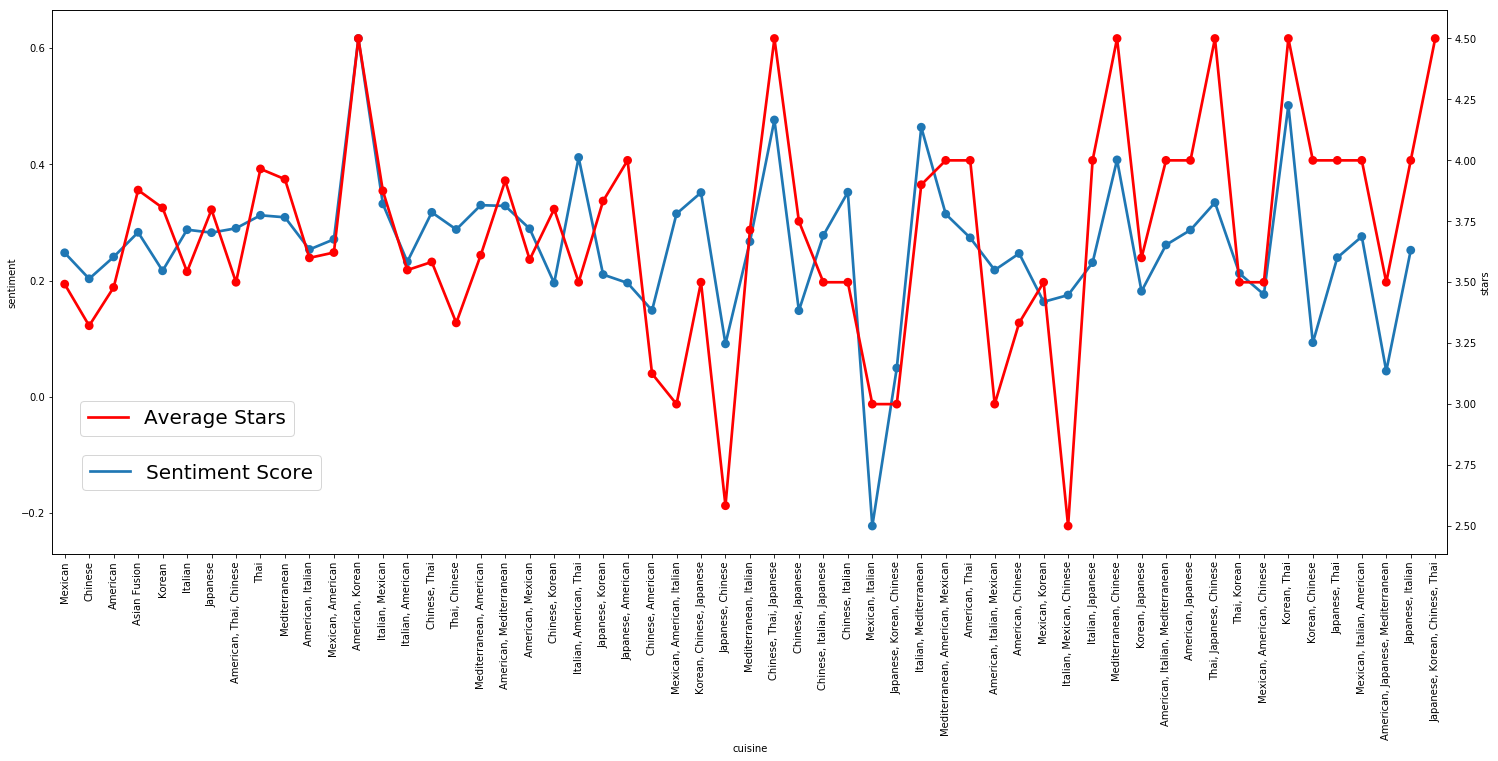

In [211]:
plt.figure(figsize=(25,10))
cuisines=df[df['cuisine']!='Others']
ax=sns.pointplot(x='cuisine', y='sentiment',join=True,ci=None, estimator=mean,data=cuisines)
plt.legend(['Sentiment Score'],prop={'size' : 20},bbox_to_anchor=(0.2,0.2));
ax2 = ax.twinx()
sns.pointplot(x='cuisine', y='stars',join=True,ci=None, estimator=mean,data=cuisines,color='red',ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
plt.legend(['Average Stars'],bbox_to_anchor=(0.18,0.3),prop={'size': 20});


According to the plot, the derived score for sentimental analysis and average stars fall into very similar patterns. Hense we can say that customers are writing down what they are feeling. More importantly, this discovery can tell for a new customer who's looking for restaurant in Las Vegas that rating star is a reliable standard if they don't have time to go through every single reviews.

In addition, since we did plot based on cuisine, we found that American food is the most welcomed cuisine on average while Mexican food is at the bottom in Las Vegas.


## 2. For customers, how to find an ideal restaurant with features they want?


In [158]:
def findmyresturant(WiFi=None,OutdoorSeating=None,RestaurantsDelivery=None,BusinessAcceptsCreditCards=None,RestaurantsReservations=None,Alcohol=None,cuisine=None):
    if WiFi!=None:
        df_1 = df[df['WiFi'].notnull()]
        df_2 = df_1[df_1['WiFi']!=False]
        df_wifi = df_2[df_2['WiFi']!='No']
    else:
        df_wifi = df
    if OutdoorSeating != None:
        df_3 = df_wifi[df_wifi['OutdoorSeating'].notnull()]
        df_outdoor = df_3[df_3['OutdoorSeating']!=False]
    else:
        df_outdoor = df_wifi
    if RestaurantsDelivery != None:
        df_4 = df_outdoor[df_outdoor['RestaurantsDelivery'].notnull()]
        df_delivery = df_4[df_4['RestaurantsDelivery']!=False]
    else:
        df_delivery = df_outdoor
    if RestaurantsReservations != None:
        df_5 = df_delivery[df_delivery['RestaurantsReservations'].notnull()]
        df_reserve = df_5[df_5['RestaurantsReservations']!=False]
    else:
        df_reserve = df_delivery
    if Alcohol != None:
        df_6 = df_delivery[df_delivery['Alcohol'].notnull()]
        df_alcohol = df_6[df_6['Alcohol']!='No']
    else: 
        df_alcohol=df_reserve
    if BusinessAcceptsCreditCards !=None:
        df_cards = df_alcohol[df_alcohol['BusinessAcceptsCreditCards']==True]
    else:
        df_cards = df_alcohol
    if cuisine != None:
        df_cuisine = df_cards[df_cards['cuisine'].str.contains(cuisine)]
    else:
        df_cuisine = df_cards
        
    df_cuisine=df_cuisine.sort_values(['stars','review_count'],ascending=False)
    new_df= df_cuisine[['cuisine','stars','postal_code','review_count','OutdoorSeating','BusinessAcceptsCreditCards',
 'RestaurantsDelivery','RestaurantsReservations','WiFi','Alcohol',2016,2017,2018]]
    %pylab inline
    import pandas as pd
    import seaborn as sns
    plot=new_df.reset_index().iloc[:5]
    g = sns.FacetGrid(plot, row='name', sharex=True, sharey=True, height=3,aspect=1.5)
    g=g.map(plt.scatter, 2018, 'review_count',marker='s');
    g=g.map(plt.scatter,'stars','review_count',color='red');
    plt.legend(('2018 Stars','Average Stars'),bbox_to_anchor=(1,5))
    return new_df.head(10)

Populating the interactive namespace from numpy and matplotlib


,,cuisine,stars,postal_code,review_count,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,2016,2017,2018
name,address,,,,,,,,,,,,,
Chubby Cattle,"3400 S Jones Blvd, Ste 15",Chinese,4.5,89146,1000,False,True,False,True,Free,Full_Bar,4.492147,4.394737,4.411985
Picasso,3600 S Las Vegas Blvd,"Mediterranean, Chinese",4.5,89109,868,True,True,False,True,Free,Full_Bar,4.240000,4.344444,4.112500
I. C. China Bistro,"8125 W Sahara Ave, Ste 300",Chinese,4.5,89117,127,False,True,True,True,Free,Full_Bar,NaN,NaN,4.356589
Xiang Wei Xuan-湘味轩,"6000 Spring Mountain Rd, Ste 2B",Chinese,4.5,89146,89,False,True,True,True,Free,Beer&Wine,4.600000,4.520000,3.583333
Soul Foo Young,1216 W Owens Ave,Chinese,4.5,89108,55,False,True,False,False,Free,Full_Bar,NaN,5.000000,4.264706
King Solomon's Table,4561 W Flamingo Rd,"Mediterranean, Chinese",4.5,89103,13,False,True,True,True,Free,Full_Bar,NaN,4.400000,4.250000
Phoenix,300 W Sahara Ave,Chinese,4.5,89102,13,False,True,False,True,Free,Full_Bar,NaN,4.538462,NaN
Indian Theme Bistro印第安啤酒屋,"3460 Arville St, Ste 7",Chinese,4.5,89102,7,True,True,False,True,Free,Full_Bar,5.000000,4.500000,3.000000
Sushi 21,"4965 W Tropicana Ave, Ste 102","Korean, Chinese, Japanese",4.0,89103,718,False,True,True,True,Free,Beer&Wine,4.094595,4.335443,3.600000


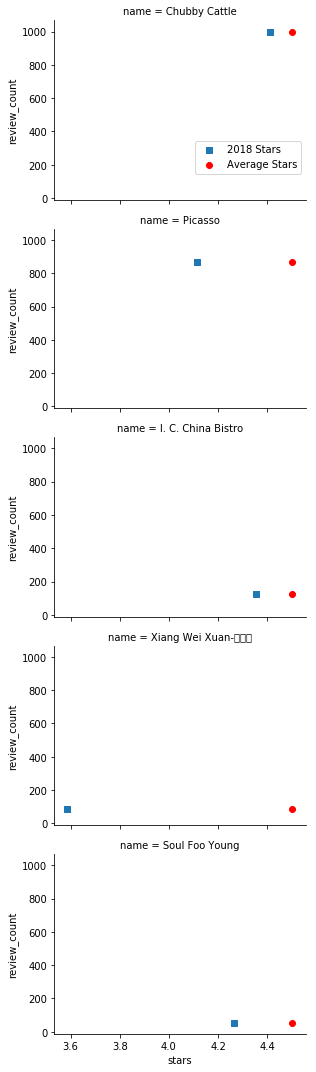

In [159]:
findmyresturant(WiFi='yes',Alcohol='yes',cuisine='Chinese')

Populating the interactive namespace from numpy and matplotlib


,,cuisine,stars,postal_code,review_count,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,2016,2017,2018
name,address,,,,,,,,,,,,,
Karved,3957 S Maryland Pkwy,American,5.0,89119,313,False,True,True,False,Free,No,NaN,4.923077,4.730290
Sausagefest,"953 E Sahara Ave, Ste E8","American, Italian",5.0,89104,118,False,True,False,True,Free,Beer&Wine,NaN,5.000000,4.823529
Mordeo Boutique Wine Bar,"5420 W Spring Mountain Rd, Ste 108",American,5.0,89146,104,False,True,False,True,Free,Beer&Wine,NaN,NaN,4.742857
Flowing Tide Pub 6,4680 S Decatur Blvd,American,5.0,89103,53,True,True,False,False,Free,Full_Bar,NaN,NaN,4.754717
Rachel's Kitchen,888 W Bonneville Ave,American,5.0,89106,19,True,True,False,False,Free,No,4.333333,5.000000,5.000000
Southern Hills Cafe,9300 W Sunset Rd,American,5.0,89148,4,False,True,False,False,Free,No,NaN,NaN,5.000000
"Scotty""s Kitchen",3050 E Desert Inn Rd,American,5.0,89121,3,False,False,False,False,Free,Full_Bar,5.000000,NaN,NaN
Earl of Sandwich,3667 Las Vegas Blvd S,American,4.5,89109,5075,False,True,False,False,Free,Beer&Wine,4.215736,4.293040,4.417476
Yardbird Southern Table & Bar,3355 Las Vegas Blvd S,American,4.5,89109,3576,False,True,False,True,Free,Full_Bar,4.424198,4.517361,4.601023


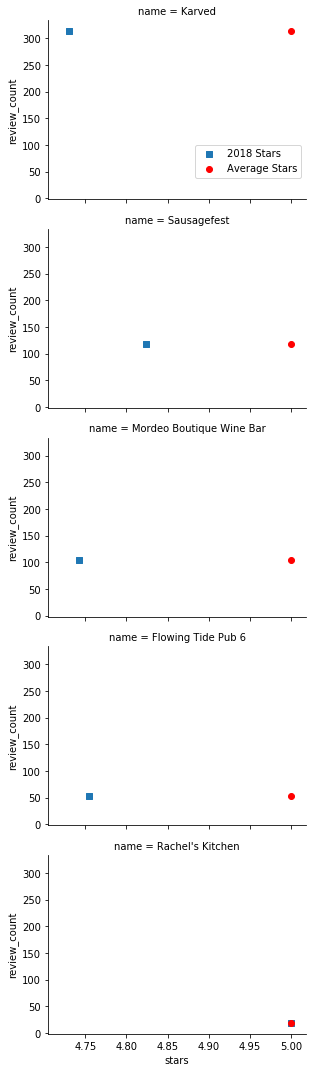

In [161]:
findmyresturant(WiFi='yes',OutdoorSeating='yes',cuisine='American',RestaurantsDelivery='yes')

The function is designed for customers to find their ideal restaurant based on their needs. When apply the function, the input paramters can be any attributes a resturant have in the dataset along with its cuisine. This include if a resturant accepts credit card, if it has delivery services, if it provides alcohol, if it takes reservation etc. 

The output is the dataframe with top ten resturants with highest stars and review counts matching their requests. The function also generates a plot that can visualize where the top 5 restaurants' review counts and star rating set. Most importantly, the plot compares the average star rating to the newest star rating (i.e. star of 2018). Hence, customer can be aware that a restaurant with overall high rating may be going down recently and is not performing to the optimal based on its prior reputation.

This can also be used by food critics to analyse the performance of restaurants over the years and would help them rate their experience based on this benchmark.

## 3. In city like Las Vegas, does restaurant closing time affect review counts and sentiments?

In [92]:
df['review_count']=df['review_count'].fillna(0.0)
df_close_hour = df[df['Friday_Close'].notnull()].reset_index()
df_close_hour['Friday_Close'] = df_close_hour['Friday_Close'].map(lambda t: dt.datetime(year=2018, month=12, day=30, hour=t.hour, minute=t.minute))
df_close_hour.set_index('Friday_Close',inplace=True)

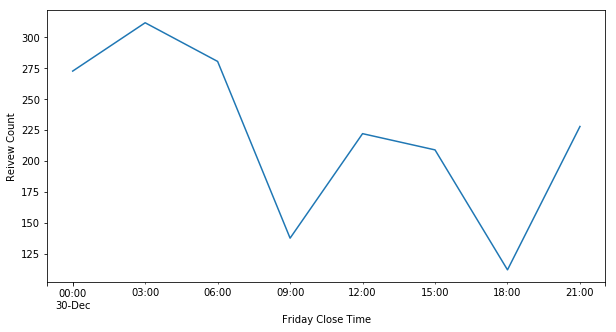

In [173]:
df_close_hour['review_count'].resample('180Min').mean().plot(figsize=(10,5));
plt.xlabel ('Friday Close Time');
plt.ylabel ('Reivew Count');

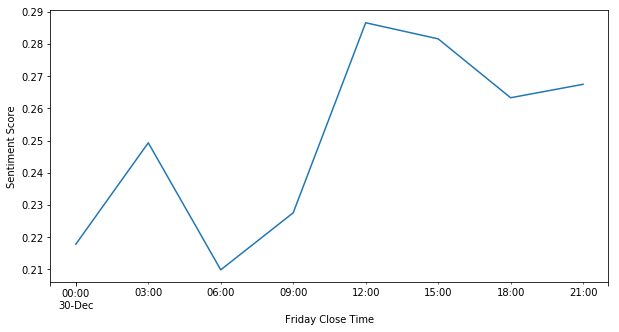

In [174]:
df_close_hour['sentiment'].resample('180Min').mean().plot(figsize=(10,5));
plt.xlabel ('Friday Close Time');
plt.ylabel ('Sentiment Score');

In [95]:
df[df['Saturday_Close']==datetime.time(15, 30)][['cuisine','stars','categories']]

,,cuisine,stars,categories
name,address,,,
Dirty Fork,3655 S Durango Dr,Others,4.0,"Coffee & Tea, Hawaiian, Restaurants, Breakfast..."
Empire Bagels,6105 S Fort Apache Rd,Others,3.0,"Delis, Restaurants, Breakfast & Brunch, Food, ..."
Flock & Fowl,380 W Sahara Ave,Asian Fusion,4.5,"Chicken Shop, Singaporean, Asian Fusion, Resta..."
Stage LV,9010 W Flamingo Rd,American,5.0,"Food Trucks, Food, Restaurants, Breakfast & Br..."


Two plots generated above are showing the relationship between how late a restaurant closes, its rating and review counts. Interestingly, we found that restaurants which close late or open 24 hours generally have high review counts but low ratings. 

This indicates that business open late nights have a lot of customers coming in but may not serve food with good quality. While businesses closes early, those which are more likely to be restaurants serving food instead of bars serving alcohol primarily, serve better quality of food.

### 4. How is the most talked-about restaurant among elite members performing?

In [96]:
users13 = users.loc[users['years_of_elite']==13]
users_elite = users13.sort_values('review',ascending=False).iloc[0:30]
users_elite.set_index('user_id',inplace=True)

In [97]:
tip_new1 = tip_new.set_index('user_id')
users_elite1 = users_elite.join(tip_new1,how='inner',on='user_id')

In [98]:
elite_top5 = users_elite1['restaurant_name'].value_counts().iloc[0:10]
elite_top5 = pd.DataFrame(elite_top5)
elite_top5.rename(columns={'restaurant_name':'common_review'},inplace=True)

<Figure size 1080x576 with 0 Axes>

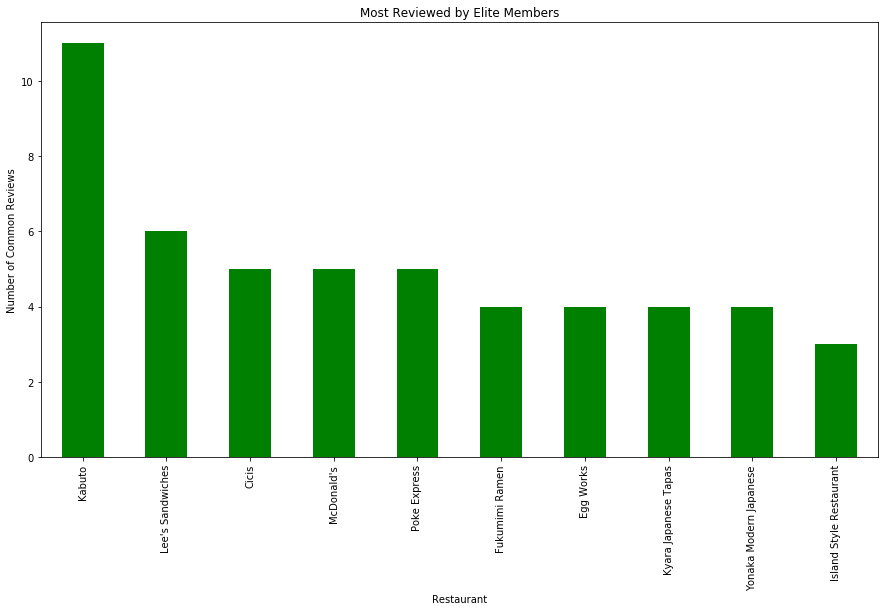

In [180]:
plt.figure(figsize(15,8));
elite_top5.plot(kind='bar',color='g',legend=False);
plt.title('Most Reviewed by Elite Members');
plt.xlabel('Restaurant');
plt.ylabel('Number of Common Reviews');

In [100]:
tip_new2 = tip_new.set_index('user_id')
user_tip = users.join(tip_new2, how='inner',on='user_id')

In [101]:
Review['review_year'] = Review['date'].dt.year

In [102]:
new = pd.merge(Rest_new_hours, Review, on='business_id', how='outer')

In [103]:
new1 =new[['name','review_year','stars_y']]
new1 = new1.groupby(['name','review_year']).mean().reset_index()

In [181]:
##def a function for checking rate trending for a restaurant 

def rate_trend(name):       
    a =new1.loc[new1['name']==name]
    plt.figure(figsize=(10,8))
    sns.pointplot(x=a['review_year'],y=a['stars_y'],data=a,join=True,color='m')
    plt.yticks(np.arange(0, 6, step=1))
    plt.ylabel('Average Stars')  
    plt.xlabel('Year')
    plt.title('Rating Trend: '+str(name) )
    

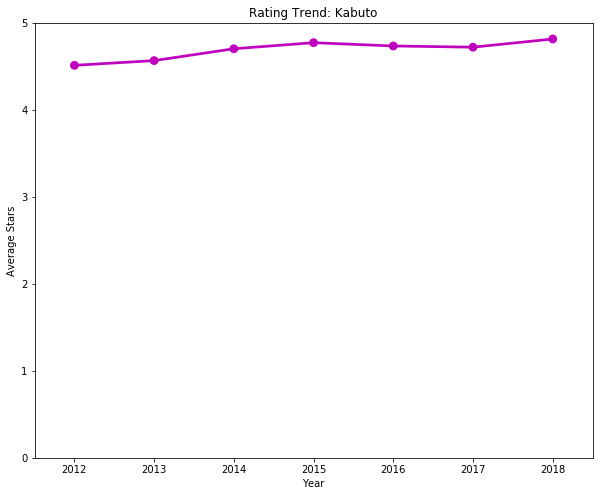

In [182]:
rate_trend('Kabuto')

### Follow the Expert Story

We would like to know which restaurants the longest-run elite members most talked about. Therefore, we first find out the users who have been elite members for the longest time. Then we grouped 30 of the users who have been elite members for 13 years. From the 'Most Reviewed by Elite Members' bar plot, we can see that 'Kabuto', a Japanese restaurant, has been talked about by 11 out of 30 elite members compared to the second one, Lee's sandwiches, was only talked about by 6 of them. 

After that, we used a function that can check restaurant rating trend throughout the years it is on Yelp! to determine whether this most-talked about restaurant among elite members are doing well or not. If the restaurant's rating is high, it means that the opinion from the 'experts' are actually trustworthy. 

From the 'Rating Trend: Kabuto' lineplot, we can see that the rating of this restaurant has never dropped below 4.5 and the rating is actually increasing in recent years. Therefore, customers who would like to follow the experts' footstep for finding good restaurant can trust the rating/comments provided by the elite members. Of course, they can always check any restaurant rating with the function to see if their choice for dinner or lunch is good or not.

### 5. Yelp's Perspective: What do users talk the most about and what can Yelp do to improve their website/app experience?

Yelp has been consistently awarded the best food rating and review app in the US. To further enhance their experience, we suggest that Yelp should listen to what the users are saying and add filters and other refinements to teir website and app for people to have an wholesome experience.

In other words, to understand what users talk about the most, we have created a dictionary of the most commonly used words in reviews about food and emotions associated with Gastronomy. 

#### Created a corpus of 30 selected words to understand the tips given by users

In [106]:
chosen_words = ['awesome', 'service', 'cheap', 'expensive', 'price', 'yummy', 'delicious', 'again', 'great',
                'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'place', 'strip', 'casino', 'ambience',
                'night', 'open', 'bar', 'nice', 'friendly', 'hostile', 'excellent','awful', 'wow', 'hate','staff']
print(chosen_words)

['awesome', 'service', 'cheap', 'expensive', 'price', 'yummy', 'delicious', 'again', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'place', 'strip', 'casino', 'ambience', 'night', 'open', 'bar', 'nice', 'friendly', 'hostile', 'excellent', 'awful', 'wow', 'hate', 'staff']


In [107]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=chosen_words, lowercase=False)

selected_word_count = vectorizer.fit_transform(tip1['user_tips'].values)
print(vectorizer.get_feature_names())

['awesome', 'service', 'cheap', 'expensive', 'price', 'yummy', 'delicious', 'again', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'place', 'strip', 'casino', 'ambience', 'night', 'open', 'bar', 'nice', 'friendly', 'hostile', 'excellent', 'awful', 'wow', 'hate', 'staff']


In [108]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(252603, 30)

In [109]:
word_count_array
word_count_array.sum(axis=0)

array([ 5257, 21876,  1025,   807,  3234,  2400,  6531,  2994, 17598,
        1129,  6893,  6692,   758,  2542,   543, 22168,  1560,   707,
         312,  3772,  2541,  3634,  4263,  4902,     2,  2386,   249,
         238,   219,  4654])

In [110]:
Yelp_words = pd.DataFrame(index=vectorizer.get_feature_names(),
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Value Count'})

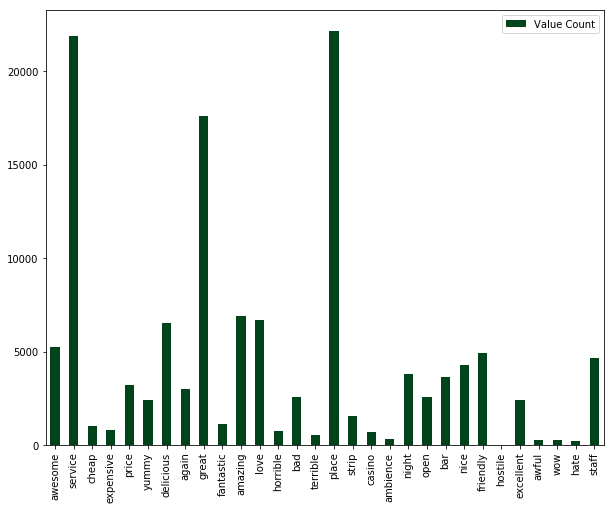

In [111]:
Yelp_words.plot(kind='bar', stacked=False, figsize=[10,8], colormap='Greens_r');

### We are here on a holiday and we are keen for great quality service!

Based on the analysis we did on what people have to say about Las Vegas, we see that majority of the people are in Las Vegas to enjoy, spend some quality time with family and friends, gamble and spend their time in fun and frolic.

The word Service was the most sought after in their reviews, followed by place or location.

This points us to the fact that people are more fascinated with the location of restaurants, how close are they to attractions and how good is the quality of staff and service rather than concentrating on cheap and inexpensive food or other price related parameters. 







#### WordCloud of User's tips:

To reinforce what we mentioned above, we created a wordcloud and it confirms that -

- Great food
- Great service
- Love place
- Best food
- Happy hour
- Tasty, yummy, delicious
 
are the words that pop out giving an overall positive vibe to Las Vegas.
    

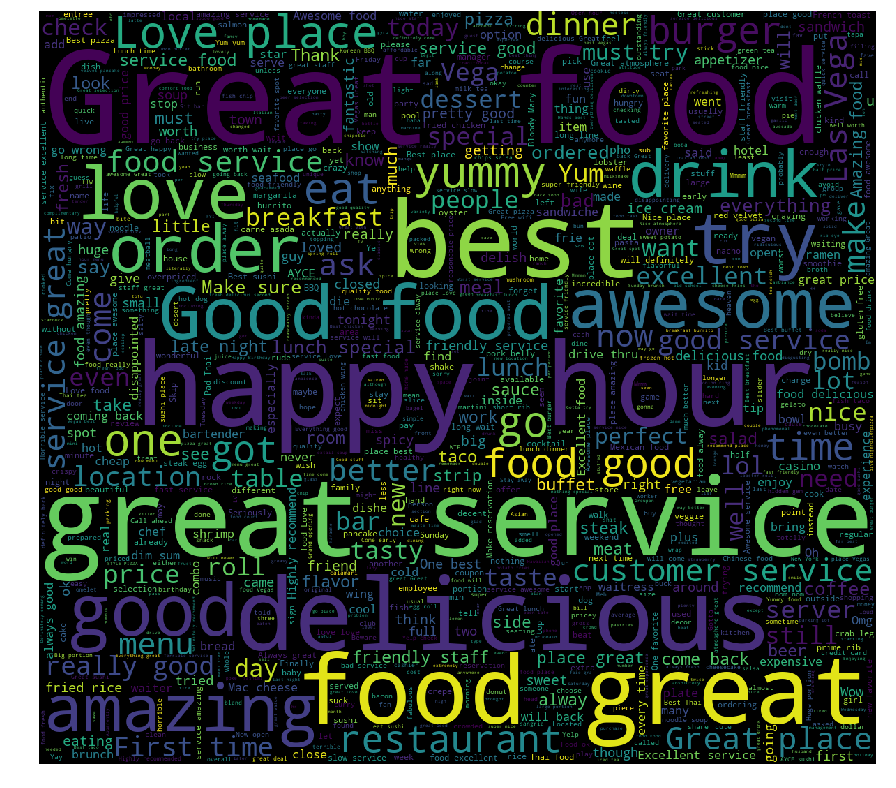

In [112]:
cloud = WordCloud(width=1200, height= 1080,max_words= 1000).generate(' '.join(tip1['user_tips'].astype(str)))
plt.figure(figsize=(15, 25))
plt.imshow(cloud)
plt.axis('off');

# Summary of Findings

1. Are the customers rating the way they are feeling? Yes, the customers are giving honest feedbacks about the restaurants. If they are happy about the restaurants, they tend to give higher rating.
2. In city like Las Vegas, does how late the restaurant close affect review counts and sentiments? Yes, the later it closes, the lower the sentiments and review counts is. 
3. How is the most talked-about restaurant among elite members performing? The most talked-about restaurant among elite members- Kabuto is performing really well that the rating never drops below 4.5 out of 5.
4. What do users talk the most about and what can Yelp do to improve their website/app experience? 


# Conclusion: What is Las Vegas trying to tell us?

1. The restaurants are amazing!
2. People look for great service.
3. Price is not the major concern for choosing restaurants.
4. Staff, Service and Quality of food makes the major difference in choosing the best restaurants.
5. The food is yummy, delicious and overall, people are pretty happy dining at Las Vegas.